In [205]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

## Let's run through a basic analysis of one proxy Organism

#### Arctic Bay, Arctic: Coralline Algae (1967-2008)

In [206]:
raw_paleo_data = pd.read_csv("d18O_raw/ab_d18O_raw.csv")
raw_paleo_data.head()

,year,d18O
0,2008,-0.048160
1,2007,-0.045444
2,2006,-0.070624
3,2005,-0.095804
4,2004,0.027000


In [207]:
temp_data = pd.read_csv("temp_raw/ab_SODA_1x1_raw.csv")
temp_data.head(10)

,Unnamed: 0,time,lat,lon,depth,temp,salt
0,1,1967-01-15T00:00:00Z,72.75,273.75,5.01,-1.280347,31.575184
1,2,1967-01-15T00:00:00Z,72.75,274.25,5.01,-1.280931,31.576525
2,3,1967-01-15T00:00:00Z,73.25,273.75,5.01,-1.298791,31.579832
3,4,1967-01-15T00:00:00Z,73.25,274.25,5.01,-1.324163,31.503399
4,5,1967-01-15T00:00:00Z,73.75,273.75,5.01,-1.425924,30.357185
5,6,1967-01-15T00:00:00Z,73.75,274.25,5.01,-1.409098,30.414881
6,7,1967-02-15T00:00:00Z,72.75,273.75,5.01,-1.279240,31.829067
7,8,1967-02-15T00:00:00Z,72.75,274.25,5.01,-1.281839,31.826092
8,9,1967-02-15T00:00:00Z,73.25,273.75,5.01,-1.320389,31.776814
9,10,1967-02-15T00:00:00Z,73.25,274.25,5.01,-1.360575,31.597593


Let's make sure this temperature is averaged across the grid such that each month only has one temperature and one salinity value across the multiple lat/long pairs. 

In [208]:
monthly_temp_data = temp_data.groupby('time')

print(monthly_temp_data['temp'].agg(np.mean))

time
1967-01-15T00:00:00Z   -1.336542
1967-02-15T00:00:00Z   -1.343062
1967-03-15T00:00:00Z   -1.377000
1967-04-15T00:00:00Z   -1.455148
1967-05-15T00:00:00Z   -1.514044
                          ...   
2008-08-15T00:00:00Z   -0.197338
2008-09-15T00:00:00Z   -0.944179
2008-10-15T00:00:00Z   -1.022546
2008-11-15T00:00:00Z   -1.116120
2008-12-15T00:00:00Z   -1.164364
Name: temp, Length: 504, dtype: float64


Let's average these temperatures across years, across the grids. 

In [209]:
temp_data['year'] = temp_data['time'].apply(lambda x: x[0:4])
temp_data

,Unnamed: 0,time,lat,lon,depth,temp,salt,year
0,1,1967-01-15T00:00:00Z,72.75,273.75,5.01,-1.280347,31.575184,1967
1,2,1967-01-15T00:00:00Z,72.75,274.25,5.01,-1.280931,31.576525,1967
2,3,1967-01-15T00:00:00Z,73.25,273.75,5.01,-1.298791,31.579832,1967
3,4,1967-01-15T00:00:00Z,73.25,274.25,5.01,-1.324163,31.503399,1967
4,5,1967-01-15T00:00:00Z,73.75,273.75,5.01,-1.425924,30.357185,1967
...,...,...,...,...,...,...,...,...
3019,3020,2008-12-15T00:00:00Z,72.75,274.25,5.01,-1.109940,31.780386,2008
3020,3021,2008-12-15T00:00:00Z,73.25,273.75,5.01,-1.116151,31.646585,2008
3021,3022,2008-12-15T00:00:00Z,73.25,274.25,5.01,-1.128340,31.521568,2008
3022,3023,2008-12-15T00:00:00Z,73.75,273.75,5.01,-1.263921,30.873104,2008


Voila, now we have the average Sea Surface Temp for that lat/long grid on an annual basis:

In [210]:
actual_annual_temp = temp_data.groupby('year')['temp'].agg(np.mean).to_frame().reset_index()
# annual_temp['lat'] = 73.25
# annual_temp['long'] = 274.75

actual_annual_temp.head()

,year,temp
0,1967,-1.301917
1,1968,-0.175512
2,1969,-0.575391
3,1970,-1.314653
4,1971,-1.344812


Let's see how these two factors naturally correlate:

In [211]:
#pre-process for the merge

actual_annual_temp['year'] = actual_annual_temp['year'].apply(lambda x: int(x))

In [212]:
temp_and_algae = pd.merge(actual_annual_temp, paleo_data, on='year')
temp_and_algae.set_index('year').head()

,temp,d18O
year,,
1967,-1.301917,-0.132046
1968,-0.175512,-0.134891
1969,-0.575391,-0.137737
1970,-1.314653,-0.134845
1971,-1.344812,-0.131952


In [213]:
import matplotlib.pyplot as plt


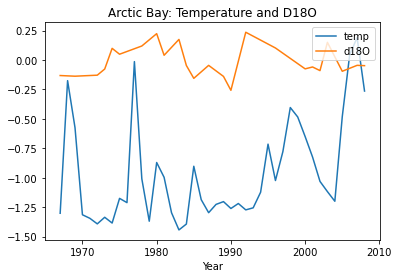

In [214]:
plt.plot(temp_and_algae['year'], temp_and_algae['temp'])
plt.plot(temp_and_algae['year'], temp_and_algae['d18O'])
plt.title('Arctic Bay: Temperature and D18O')
plt.xlabel('Year')
plt.legend(['temp', 'd18O'], loc='upper right')
plt.show()

We can see from the graph that there's some sort of relationships between the spikes in temp and d18O, but our correlation coefficient is rather underwhelming:

In [215]:
np.corrcoef(temp_and_algae['temp'], temp_and_algae['d18O'])

array([[ 1.        , -0.12974504],
       [-0.12974504,  1.        ]])

In [216]:
import statistics
statistics.variance(temp_and_algae['temp']), statistics.variance(temp_and_algae['d18O'])

(0.19341078570023343, 0.015289237992896332)

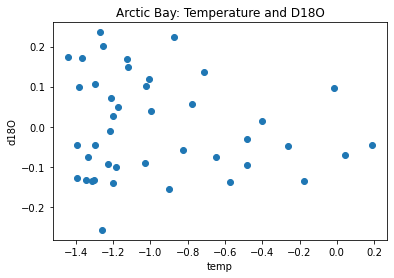

In [217]:
plt.scatter(temp_and_algae['temp'], temp_and_algae['d18O'])
plt.title('Arctic Bay: Temperature and D18O')
plt.xlabel('temp')
plt.ylabel('d18O')

# plt.legend(['temp', 'd18O'], loc='upper right')
plt.show()

Writing a function that can do this for any of the organisms on file:

In [218]:
def exploration(d18O_raw_filename, temp_raw_filename):
    raw_paleo_data = pd.read_csv("d18O_raw/" + d18O_raw_filename)
    temp_data = pd.read_csv("temp_raw/" + temp_raw_filename)
    
    temp_data['year'] = temp_data['time'].apply(lambda x: x[0:4])
    
    actual_annual_temp = temp_data.groupby('year')['temp'].agg(np.mean).to_frame().reset_index()
    actual_annual_temp['year'] = actual_annual_temp['year'].apply(lambda x: int(x))
    
    temp_and_algae = pd.merge(actual_annual_temp, paleo_data, on='year')
    temp_and_algae.set_index('year')
    
    print('pearson correlation:')
    print(np.corrcoef(temp_and_algae['temp'], temp_and_algae['d18O']))
    
    plt.plot(temp_and_algae['year'], temp_and_algae['temp'])
    plt.plot(temp_and_algae['year'], temp_and_algae['d18O'])
    plt.title(d18O_raw_filename.split("_")[0] +": Temperature and D18O")
    plt.xlabel('Year')
    plt.legend(['temp', 'd18O'], loc='upper right')
    plt.show()

pearson correlation:
[[1.         0.29219553]
 [0.29219553 1.        ]]


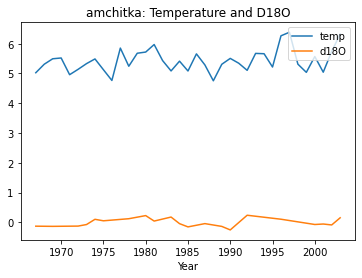

In [219]:
exploration('amchitka_d18O_raw.csv', 'amchitka_SODA_1x1_raw.csv')

pearson correlation:
[[1.         0.22937195]
 [0.22937195 1.        ]]


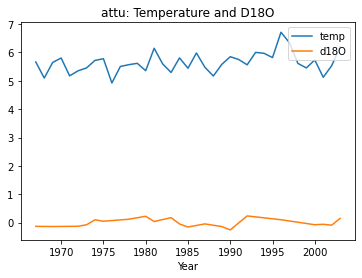

In [220]:
exploration('attu_d18O_raw.csv', 'attu_SODA_1x1_raw.csv')

pearson correlation:
[[ 1.         -0.15474578]
 [-0.15474578  1.        ]]


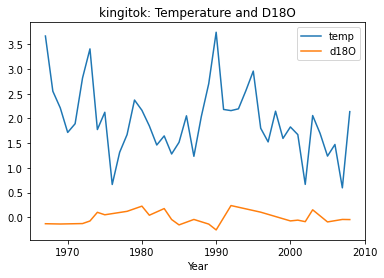

In [221]:
exploration('kingitok_d18O_raw.csv', 'Kingitok_SODA_1x1_raw.csv')

pearson correlation:
[[ 1.         -0.39210198]
 [-0.39210198  1.        ]]


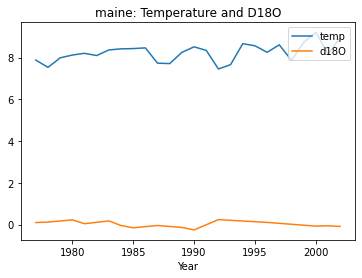

In [222]:
exploration('maine_d18O_raw.csv', 'maine_SODA_1x1_raw.csv')

pearson correlation:
[[ 1.         -0.12939033]
 [-0.12939033  1.        ]]


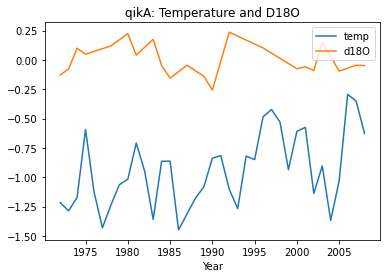

In [223]:
exploration('qikA_d18O_raw.csv', 'qikA_SODA_1x1_raw.csv')

pearson correlation:
[[ 1.         -0.10766705]
 [-0.10766705  1.        ]]


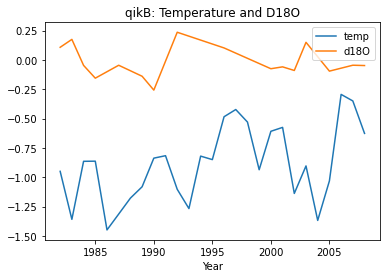

In [224]:
exploration('qikB_d18O_raw.csv', 'qikB_SODA_1x1_raw.csv')

## Introducing, Aspects of Machine Learning

In [225]:
temp_and_algae['lat'] = 73.25
temp_and_algae['long'] = 274.75
temp_and_algae = temp_and_algae.reset_index()
temp_and_algae.head()

,index,year,temp,d18O,lat,long
0,0,1967,-1.301917,-0.132046,73.25,274.75
1,1,1968,-0.175512,-0.134891,73.25,274.75
2,2,1969,-0.575391,-0.137737,73.25,274.75
3,3,1970,-1.314653,-0.134845,73.25,274.75
4,4,1971,-1.344812,-0.131952,73.25,274.75


As a proof of concept, let's build a little 'neural network' with all of our algae datasets. We want to predict `temp`, given `year`, `d18O`, `lat`, and `long`.

First, let'sconfigure all the data into one big dataframe.

Then, let's scale everything between 1 and 0

In [333]:
paleo_df = ''
paleo_df

''

In [334]:
algae_files = [['ab_d18O_raw.csv', 73.25, 274.75, 5],
                ['amchitka_d18O_raw.csv', 51.42, 179.23, 5], 
                ['attu_d18O_raw.csv', 52.78, 173.17, 5],
                ['Kingitok_d18O_raw.csv', 55.4, 300.15, 15],
                #['maine_d18O_raw.csv',44.13,291.75,10],
                ['qikA_d18O_raw.csv', 67.56,295.98,5],
                ['qikB_d18O_raw.csv', 67.56,295.98,5]
               ]
                 
                 
temperature_files = [
    'ab_SODA_1x1_raw.csv', 
    'amchitka_SODA_1x1_raw.csv',
    'attu_SODA_1x1_raw.csv',
    'kingitok_SODA_1x1_raw.csv', 
    #'maine_SODA_1x1_raw.csv',
    'qikA_SODA_1x1_raw.csv', 
    'qikB_SODA_1x1_raw.csv']

In [335]:
paleo_df = ''
paleo_df = pd.DataFrame()

count = 0
for temperature_file in temperature_files:
    temp_data = pd.read_csv('temp_raw/' + temperature_file)
    print(temperature_file)
    # locate the year value
    temp_data['year'] = temp_data['time'].apply(lambda x: x[0:4])
    # group data annually
    actual_annual_temp = temp_data.groupby('year')['temp'].agg(np.mean).to_frame().reset_index()
    # convert year to an int type
    actual_annual_temp['year'] = actual_annual_temp['year'].apply(lambda x: int(x))
    algae_file = pd.read_csv('d18O_raw/' + algae_files[count][0])
    
    if algae_files[count][0] == "amchitka_d18O_raw.csv":
        algae_file = algae_file[['Year', 'AM-KR-80_d18O']]
        algae_file['d18O'] = algae_file['AM-KR-80_d18O']
        algae_file['year'] = algae_file['Year'].apply(lambda x: int(x))
        del algae_file['AM-KR-80_d18O']
        del algae_file['Year']
    
    elif algae_files[count][0] == "attu_d18O_raw.csv":
        algae_file = algae_file[['year', 'd18O']]
    else:
        algae_file['year'] = algae_file['year'].apply(lambda x: int(x))
    print(algae_files[count][0])
    
    
    temp_and_algae = pd.merge(actual_annual_temp, algae_file, on='year')
    #temp_and_algae = temp_and_algae.set_index('year').head()
    temp_and_algae['lat'] = algae_files[count][1]
    temp_and_algae['long'] = algae_files[count][2]
    temp_and_algae['depth'] = algae_files[count][3]
    paleo_df = pd.concat([paleo_df, temp_and_algae], axis= 0)
    
    count += 1
    
paleo_df

ab_SODA_1x1_raw.csv
ab_d18O_raw.csv
amchitka_SODA_1x1_raw.csv
amchitka_d18O_raw.csv
attu_SODA_1x1_raw.csv
attu_d18O_raw.csv
kingitok_SODA_1x1_raw.csv
Kingitok_d18O_raw.csv
qikA_SODA_1x1_raw.csv
qikA_d18O_raw.csv
qikB_SODA_1x1_raw.csv
qikB_d18O_raw.csv


,year,temp,d18O,lat,long,depth
0,1967,-1.301917,-0.132046,73.25,274.75,5
1,1968,-0.175512,-0.134891,73.25,274.75,5
2,1969,-0.575391,-0.137737,73.25,274.75,5
3,1970,-1.314653,-0.134845,73.25,274.75,5
4,1971,-1.344812,-0.131952,73.25,274.75,5
...,...,...,...,...,...,...
22,2004,-1.368374,-1.801891,67.56,295.98,5
23,2005,-1.031412,-2.045915,67.56,295.98,5
24,2006,-0.294162,-2.200304,67.56,295.98,5
25,2007,-0.349986,-2.143647,67.56,295.98,5


In [336]:
dataset = paleo_df.values
dataset

array([[ 1.96700000e+03, -1.30191672e+00, -1.32045520e-01,
         7.32500000e+01,  2.74750000e+02,  5.00000000e+00],
       [ 1.96800000e+03, -1.75511654e-01, -1.34891320e-01,
         7.32500000e+01,  2.74750000e+02,  5.00000000e+00],
       [ 1.96900000e+03, -5.75391262e-01, -1.37737130e-01,
         7.32500000e+01,  2.74750000e+02,  5.00000000e+00],
       ...,
       [ 2.00600000e+03, -2.94161577e-01, -2.20030379e+00,
         6.75600000e+01,  2.95980000e+02,  5.00000000e+00],
       [ 2.00700000e+03, -3.49985778e-01, -2.14364670e+00,
         6.75600000e+01,  2.95980000e+02,  5.00000000e+00],
       [ 2.00800000e+03, -6.26584879e-01, -2.21401299e+00,
         6.75600000e+01,  2.95980000e+02,  5.00000000e+00]])

In [337]:
# dataset[row indices, column indices]
X =  dataset[:,(0,2,3,4,5)] # input
Y = dataset[:, 2] # output

In [338]:
Y

array([-0.13204552, -0.13489132, -0.13773713, -0.1348445 , -0.13195188,
       -0.12905925, -0.07683414,  0.09888595,  0.04896547,  0.07226169,
        0.09555791,  0.11885414,  0.17127064,  0.22368714,  0.03997978,
        0.10737243,  0.17476507, -0.04688185, -0.15593565, -0.1008198 ,
       -0.04570395, -0.09260757, -0.13951119, -0.25754628, -0.01093911,
        0.23566806,  0.20222907,  0.16879007,  0.13535108,  0.10191208,
        0.05760745,  0.01330281, -0.03100182, -0.07530646, -0.0593797 ,
       -0.09023779,  0.14980484,  0.02700046, -0.09580392, -0.07062386,
       -0.04544379, -0.04815964, -1.709     , -1.8371    , -1.481     ,
       -1.4354    , -1.4718    , -1.3871    , -1.4854    , -1.4936    ,
       -1.4419    , -1.3087    , -1.2882    , -1.3734    , -1.5276    ,
       -1.5573    , -1.8168    , -1.8275    , -1.5315    , -1.6704    ,
       -1.7024    , -1.7384    , -1.634     , -1.6999    , -1.4932    ,
       -1.5826    , -1.2431    , -1.1839    , -1.4757    , -1.70

In [339]:
from sklearn import preprocessing

In [342]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.18      , 0.88054431, 1.        , 0.7999685 , 0.        ],
       [0.2       , 0.87961982, 1.        , 0.7999685 , 0.        ],
       [0.22      , 0.87869532, 1.        , 0.7999685 , 0.        ],
       ...,
       [0.96      , 0.20864845, 0.73934952, 0.96716018, 0.        ],
       [0.98      , 0.22705412, 0.73934952, 0.96716018, 0.        ],
       [1.        , 0.20419487, 0.73934952, 0.96716018, 0.        ]])

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(
    X_scale, Y, test_size=0.3)

In [345]:
from keras.models import Sequential
from keras.layers import Dense

In [433]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [434]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredError',
    ]
)

In [328]:
# from sklearn.metrics import r2_score

# model.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['r2_score'])

In [435]:
hist = model.fit(X_train, Y_train,
          batch_size=16, epochs=36,
          validation_data=(X_val_and_test, Y_val_and_test))

Epoch 1/36
11/11 [==============================] - 0s 11ms/step - loss: 5.1058 - mean_squared_error: 5.1058 - val_loss: 5.1129 - val_mean_squared_error: 5.1129
Epoch 2/36
11/11 [==============================] - 0s 2ms/step - loss: 4.9275 - mean_squared_error: 4.9275 - val_loss: 4.9470 - val_mean_squared_error: 4.9470
Epoch 3/36
11/11 [==============================] - 0s 3ms/step - loss: 4.7573 - mean_squared_error: 4.7573 - val_loss: 4.7867 - val_mean_squared_error: 4.7867
Epoch 4/36
11/11 [==============================] - 0s 3ms/step - loss: 4.5973 - mean_squared_error: 4.5973 - val_loss: 4.6325 - val_mean_squared_error: 4.6325
Epoch 5/36
11/11 [==============================] - 0s 3ms/step - loss: 4.4453 - mean_squared_error: 4.4453 - val_loss: 4.4879 - val_mean_squared_error: 4.4879
Epoch 6/36
11/11 [==============================] - 0s 3ms/step - loss: 4.3007 - mean_squared_error: 4.3007 - val_loss: 4.3496 - val_mean_squared_error: 4.3496
Epoch 7/36
11/11 [=====================

In [436]:
model.evaluate(X_val_and_test, Y_val_and_test)[1]

3/3 [==============================] - 0s 3ms/step - loss: 3.4324 - mean_squared_error: 3.4324


3.4324374198913574

In [362]:
import matplotlib.pyplot as plt

# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model RMSE')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper right')
# plt.show()

In [361]:
# hist.history

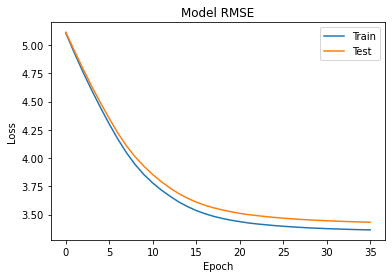

In [437]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Let's try to visualize this on a time series plot

In [372]:
# X_val_and_test

In [371]:
# model.predict(X_val_and_test)

In [370]:
# Y_val_and_test

In [438]:
actual = pd.DataFrame(Y_val_and_test, columns=["actual"])
actual

,actual
0,-1.816800
1,0.223687
2,-1.937500
3,-1.780000
4,-0.045704
...,...
65,-0.100820
66,-1.880000
67,-2.200304
68,-1.790000


In [439]:
predicted = pd.DataFrame(model.predict(X_val_and_test), columns=["pred"])
predicted

,pred
0,0.027567
1,0.000200
2,0.001721
3,0.016140
4,0.000216
...,...
65,0.000232
66,0.018027
67,0.001451
68,0.026463


In [443]:
actual_v_pred = actual.join(predicted, how = "inner")
actual_v_pred['pred_mult_neg100'] = actual_v_pred['pred'].apply(lambda x: x*-100)
actual_v_pred

,actual,pred,pred_mult_neg100
0,-1.816800,0.027567,-2.756676
1,0.223687,0.000200,-0.020030
2,-1.937500,0.001721,-0.172096
3,-1.780000,0.016140,-1.614043
4,-0.045704,0.000216,-0.021601
...,...,...,...
65,-0.100820,0.000232,-0.023186
66,-1.880000,0.018027,-1.802719
67,-2.200304,0.001451,-0.145131
68,-1.790000,0.026463,-2.646303


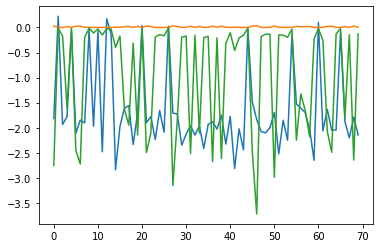

In [444]:
plt.plot(actual_v_pred)

In [445]:
import numpy as np
np.corrcoef(actual_v_pred['actual'], actual_v_pred['pred_mult_neg100'])

array([[1.        , 0.18128497],
       [0.18128497, 1.        ]])

In [446]:
np.corrcoef(actual_v_pred['actual'], actual_v_pred['pred'])

array([[ 1.        , -0.18128497],
       [-0.18128497,  1.        ]])

In [449]:
from scipy.stats import pearsonr

pearsonr(actual_v_pred['actual'], actual_v_pred['pred'])

(-0.18128497321199105, 0.13312191170609836)

This says that the two variables have a p-value of 0.13 and a correlation of -0.18). 

Let's try a regular linear regression model:

In [451]:
from sklearn.linear_model import LinearRegression

In [463]:
model = LinearRegression()
model.fit(X_train, Y_train)
preds_linear = pd.DataFrame(model.predict(X_val_and_test), columns=["pred"])
#print("Loss: " + str(loss(rounded_preds, test_labels)))

In [467]:
actual_v_pred_linear = actual.join(preds_linear, how = "inner")
actual_v_pred_linear['diff'] = actual_v_pred_linear['actual'] - actual_v_pred_linear['pred']
actual_v_pred_linear

,actual,pred,diff
0,-1.816800,-1.816800,-2.220446e-16
1,0.223687,0.223687,0.000000e+00
2,-1.937500,-1.937500,-6.661338e-16
3,-1.780000,-1.780000,4.440892e-16
4,-0.045704,-0.045704,4.857226e-17
...,...,...,...
65,-0.100820,-0.100820,1.387779e-17
66,-1.880000,-1.880000,2.220446e-16
67,-2.200304,-2.200304,-4.440892e-16
68,-1.790000,-1.790000,0.000000e+00


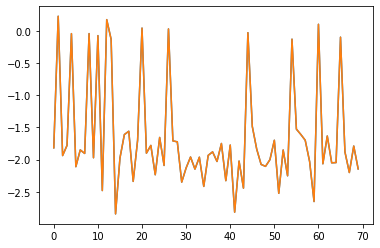

In [465]:
plt.plot(actual_v_pred_linear)